# Sympy 

[Sympy](http://sympy.org) je Python biblioteka za simboličku matematiku. Prednost Sympy-ja je što je potpuno napisan u Pythonu (što je katkad i mana). Mi ćemo u nastavku kolegiju obraditi i puno moćniji Sage, koji je [CAS](http://en.wikipedia.org/wiki/Computer_algebra_system) u klasi Mathematice i Maplea. No Sage nije biblioteka u Pythonu, već CAS koji koristi Python kao programski jezik.

Korištenje Sympy-ja počinje kao i kod ostalih biblioteka, s importiranjem.

In [1]:
from sympy import *

Da bi dobili lijepi $\LaTeX$ izlaz:

In [2]:
from sympy import init_printing
init_printing()

Koristit ćemo i interaktivne widgete, pa ih ovdje učitavamo

In [3]:
from IPython.display import display
from IPython.html import widgets
from IPython.html.widgets import interact, fixed

## Simboličke varijable

Kako je Sympy samo Python paket, trebamo deklarirati koje simbole ćemo koristiti kao simboličke vatrijable. To možemo napraviti na dva načina:

In [4]:
x = Symbol('x')

In [5]:
(pi + x)**2

In [6]:
a, b, c = symbols("stranica_a, stranica_b, stranica_c")

In [7]:
type(a)

sympy.core.symbol.Symbol

In [8]:
a

In [10]:
a, b, c = symbols("alpha, beta, gamma")
a**2+b**2+c**2

In [10]:
symbols("x:5")

Možemo navoditi i dodatne pretpostavke:

In [11]:
x = Symbol('x', real=True)

In [12]:
x.is_imaginary

False

In [7]:
x = Symbol('x', positive=True)

In [14]:
x > 0

True

Možemo kreirati i apstraktne funkcije: 

In [26]:
f = Function('f')
f(0)

In [27]:
g = Function('g')(x)
g.diff(x), g.diff(a)

### Kompleksni brojevi

Imaginarna jedinica se označava s `I`. 

In [17]:
1+1*I

In [18]:
I**2

In [19]:
(x * I + 1)**2

### Razlomci

Postoje tri numerička tipa: `Real`, `Rational`, `Integer`: 

In [20]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [21]:
r1

In [22]:
r1+r2

In [23]:
r1/r2

In [24]:
denom(r1)

### Numerička evaluacija

SymPy može računati u proizvoljnoj točnosti te ima predefinirane matematičke konstante kao: `pi`, `e` te `oo` za beskonačnost.

Funkcija `evalf` ili metoda `N` s ulaznom varijablom `n` računaju izraz na `n` decimala.

In [25]:
pi.evalf(n=50)

In [5]:
y = (x + pi)**2

In [27]:
N(y, 5)

Ukoliko želimo zamijeniti varijablu s konkretnim brojem, to možemo učiniti koristeći funkciju `subs`:

In [28]:
y.subs(x, 1.5)

In [29]:
N(y.subs(x, 1.5))

No `subs` možemo korisiti i općenitije:

In [31]:
y.subs(x, a+pi)

Sympy i Numpy se mogu simultano koristiti:

In [4]:
import numpy

In [5]:
x_vec = numpy.arange(0, 10, 0.1)

In [8]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

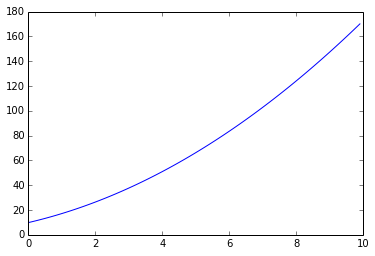

In [9]:
from matplotlib.pyplot import subplots
%matplotlib inline
fig, ax = subplots()
ax.plot(x_vec, y_vec);

Efikasniji kod se postiže funkcijom `lambdify` koja kompajlira Sympy izraz u funkciju:

In [36]:
# prvi argument je lista varijabli funkcije f, u ovom slučaju funckcija je x -> f(x)
f = lambdify([x], (x + pi)**2, 'numpy')

In [37]:
y_vec = f(x_vec)

Razlika u brzini izvođenja:

In [38]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

100 loops, best of 3: 14.2 ms per loop


In [39]:
%%timeit

y_vec = f(x_vec)

100000 loops, best of 3: 6.94 µs per loop


Pretvaranje stringa u Sympy izraz:

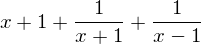

In [40]:
string = '1/(x-1) + 1/(x+1) + x + 1'
izraz = sympify(string)
izraz

Jedan interaktivan primjer:

In [6]:
x = Symbol('x')
def factorit(n):
    return display(Eq(x ** n - 1, factor(x ** n - 1)))

`Eq` kreira matematičke jednakosti, tj. jednadžbe.

In [7]:
factorit(18)

In [8]:
interact(factorit,n=(2,20));

In [9]:
interact(factorit,n=(1,20,2));

In [10]:
interact(factorit,n=widgets.IntSliderWidget(min=2,max=20,step=1,value=2));

## Algebarske manipulacije

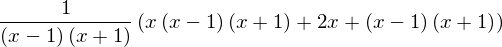

In [46]:
together(izraz)

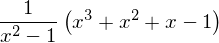

In [47]:
cancel(together(izraz))

In [48]:
(x+1)*(x+2)*(x+3)

In [49]:
expand((x+1)*(x+2)*(x+3))

`expand` prima dodatne argumente. Npr. `trig=True`:

In [11]:
sin(a+b)

In [12]:
expand(sin(a+b), trig=True)

In [13]:
factor(x**3 + 6 * x**2 + 11*x + 6)

In [14]:
simplify((x+1)*(x+2)*(x+3))

In [15]:
simplify(sin(a)**2 + cos(a)**2)

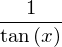

In [16]:
simplify(cos(x)/sin(x))

In [17]:
f1 = 1/((a+1)*(a+2))

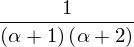

In [18]:
f1

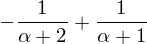

In [19]:
apart(f1)

In [20]:
f2 = 1/(a+2) + 1/(a+3)

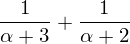

In [21]:
f2

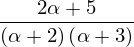

In [22]:
together(f2)

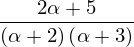

In [24]:
simplify(f2)

## Analiza

### Deriviranje

In [29]:
y

In [30]:
diff(y**2, x)

Više derivacije:

In [31]:
diff(y**2, x, x)

In [32]:
diff(y**2, x, 2)

In [33]:
x, y, z = symbols("x,y,z")

In [34]:
f = sin(x*y) + cos(y*z)

Želimo izračunati $$\frac{\partial^3f}{\partial  x \partial y^2}$$

In [35]:
diff(f, x, 1, y, 2)

In [11]:
def deriv(f):
    display(diff(f,x))
interact(deriv, f='x')

### Integracija

In [37]:
f

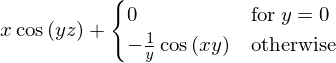

In [38]:
integrate(f, x)

Definitni integrali:

In [39]:
integrate(f, (x, -1, 1))

Nepravi integrali:

In [40]:
integrate(exp(-x**2), (x, -oo, oo))

### Sume i produkti

In [41]:
n = Symbol("n")

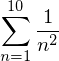

In [42]:
Sum(1/n**2, (n, 1, 10))

In [43]:
Sum(1/n**2, (n,1, 10)).evalf()

In [44]:
Sum(1/n**2, (n, 1, oo)).evalf()

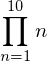

In [45]:
Product(n, (n, 1, 10))

### Limesi

In [46]:
limit(sin(x)/x, x, 0)

In [47]:
f

In [48]:
diff(f, x)

$$ \frac{\partial f(x,y)}{\partial x} = \lim_{h\to 0}\frac{f(x+h,y)-f(x,y)}{h}$$

In [49]:
h = Symbol("h")

In [50]:
limit((f.subs(x, x+h) - f)/h, h, 0)

In [51]:
limit(1/x, x, 0, dir="+")

In [52]:
limit(1/x, x, 0, dir="-")

### (Taylorovi) redovi

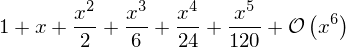

In [53]:
series(exp(x), x)

Rastav oko $x=1$:

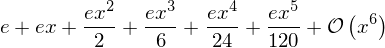

In [54]:
series(exp(x), x, 1)

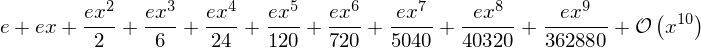

In [55]:
series(exp(x), x, 1, 10)

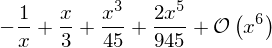

In [56]:
tan(x).series(x,pi/2)

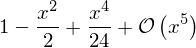

In [57]:
s1 = cos(x).series(x, 0, 5)
s1

In [58]:
s2 = sin(x).series(x, 0, 2)
s2

In [59]:
expand(s1 * s2)

S metodom `removeO` se možemo riješiti $\mathcal{O}$ dijela:

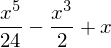

In [60]:
expand(s1.removeO() * s2.removeO())

Ali oprezno s time:

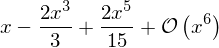

In [61]:
(cos(x)*sin(x)).series(x, 0, 6)

Reziduumi:

In [62]:
residue(2/sin(x), x, 0)

## Linearna algebra

### Matrice

In [13]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

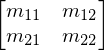

In [14]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [65]:
b = Matrix([[b1], [b2]])
b

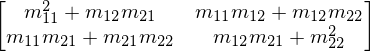

In [66]:
A**2

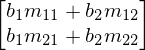

In [67]:
A * b

In [15]:
def funkcija(A,f):
    return display(getattr(A,f)())
interact(funkcija,A = fixed(A), f=('det','inv','adjoint','charpoly'));

## Rješavanje jednadžbi

In [69]:
solve(x**2 - 1, x)

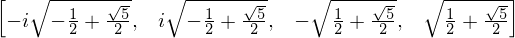

In [70]:
solve(x**4 - x**2 - 1, x)

In [71]:
eq = Eq(x**3 + 2*x**2 + 4*x + 8, 0)
eq

In [72]:
solve(eq, x)

Sustavi jednadžbi:

In [73]:
solve([x + y - 1, x - y - 1], [x,y])

In [74]:
solve([x + y - a, x - y - c], [x,y])

Više o interaktivnim widgetima možete pogledati u `Using Interact.ipynb` u ovom projektu.

##Zadaci za vježbanje

1) Napišite funkciju koja prima listu izraza, varijablu i točku, a ispisuje vrijednost svakog izraza s liste u toj točki. Funkcija treba izgledati ovako

```
def evaluiraj(izrazi, x, x0):
"""
Za svaki izraz iz izrazi funkcija ispisuje vrijednost izraza za x = x0
"""
```

2) Izračunajte 
$\frac{d}{dx}\sin(x)e^x,\,
\frac{\partial}{\partial x}\sin(xy)e^x,\,
\frac{\partial^2}{\partial x\partial y}\sin(xy)e^x.$

3) Izraz `(x**2 + 3*x + 1)/(x**3 + 2*x**2 + x)` pojednostavite do izraza `1/(x**2 + 2*x + 1) + 1/x`

4) Izraz `(a**b)**c)` pojednostavite do izraza `a**(b*c)`

5) Napišite funkciju koja rješava (egzaktno) kvadratnu jednadžbu.